In [1]:
import sys, os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams.update({'xtick.labelsize' : 16, 'axes.titlesize' : 16, 'axes.labelsize' : 16})

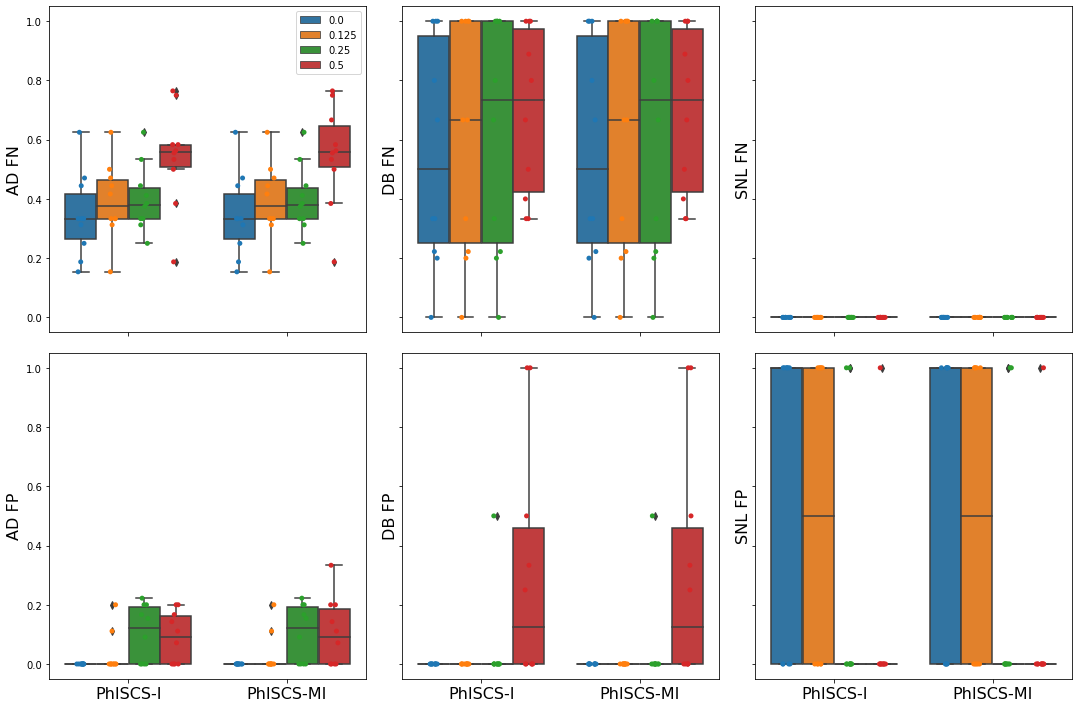

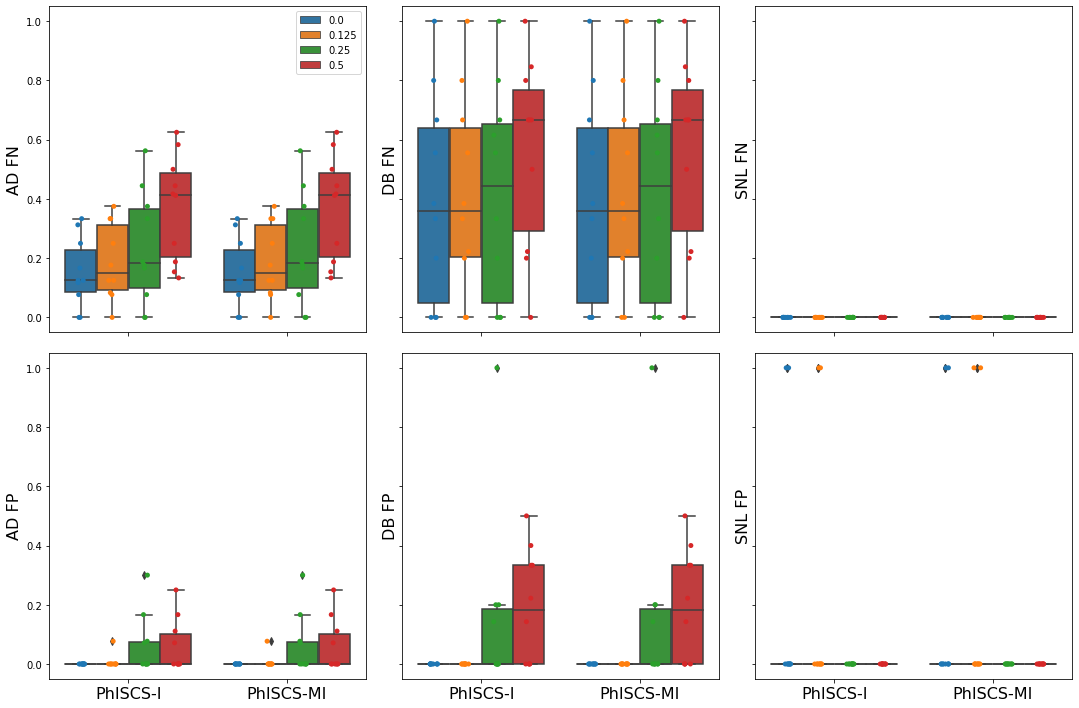

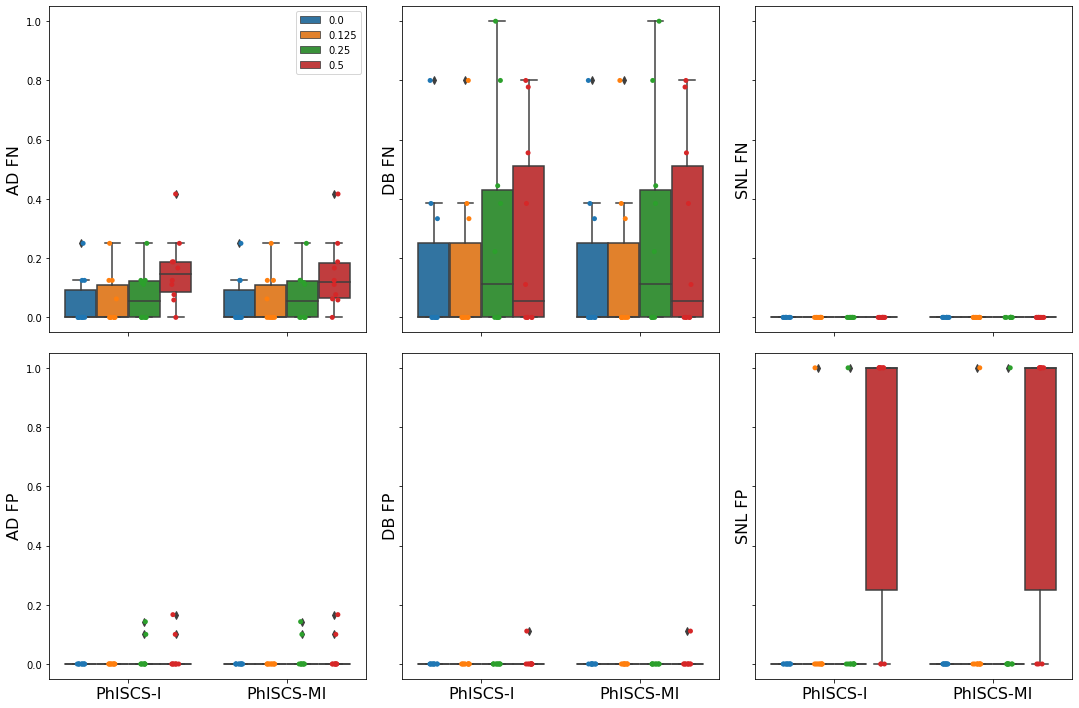

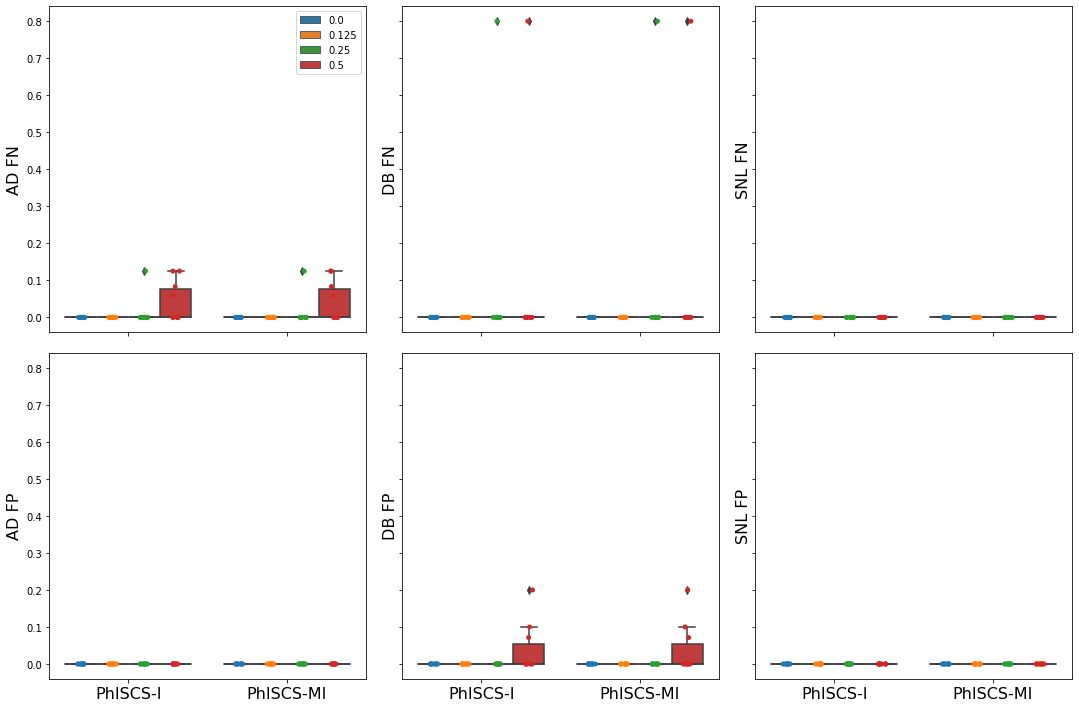

In [12]:
df = pd.read_csv("benchmark/sim2b_benchmark.csv", header=0)
df.loc[df.method == 'modified_PhISCS', 'method'] = 'PhISCS-MI'
df.loc[df.method == 'PhISCS', 'method'] = 'PhISCS-I'
if not os.path.isdir('figures/sim2b'):
    os.system('mkdir -p figures/sim2b')

# by default, we consider PhISCS with kmax=0
orders = [['AD FN', 'DB FN', 'SNL FN'], ['AD FP', 'DB FP', 'SNL FP']]

for num_cell in [10, 20, 40, 100]:
    sub_df = df.loc[(df['# cells'] == num_cell) & (df['kmax'] == 0)]
    fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey=True, sharex='col')
    fig.tight_layout()
    for i in range(2):
        for j in range(3):
            sns.boxplot(data=sub_df, x='method', hue='missing rate', y=orders[i][j], ax=ax[i][j])
            sns.stripplot(data=sub_df, x='method', hue='missing rate', y=orders[i][j], ax=ax[i][j],
                         dodge=True)
            ax[i][j].set_xlabel("")
            handles, labels = ax[i][j].get_legend_handles_labels()
            l = ax[i][j].legend(handles[0:4], labels[0:4])

            if not (i == 0 and j == 0):
                ax[i][j].get_legend().remove()
    fig.savefig("figures/sim2b/sim2b_n={}.svg".format(num_cell), bbox_inches = 'tight')
    fig.savefig("figures/sim2b/sim2b_n={}.png".format(num_cell), dpi=300, bbox_inches = 'tight')

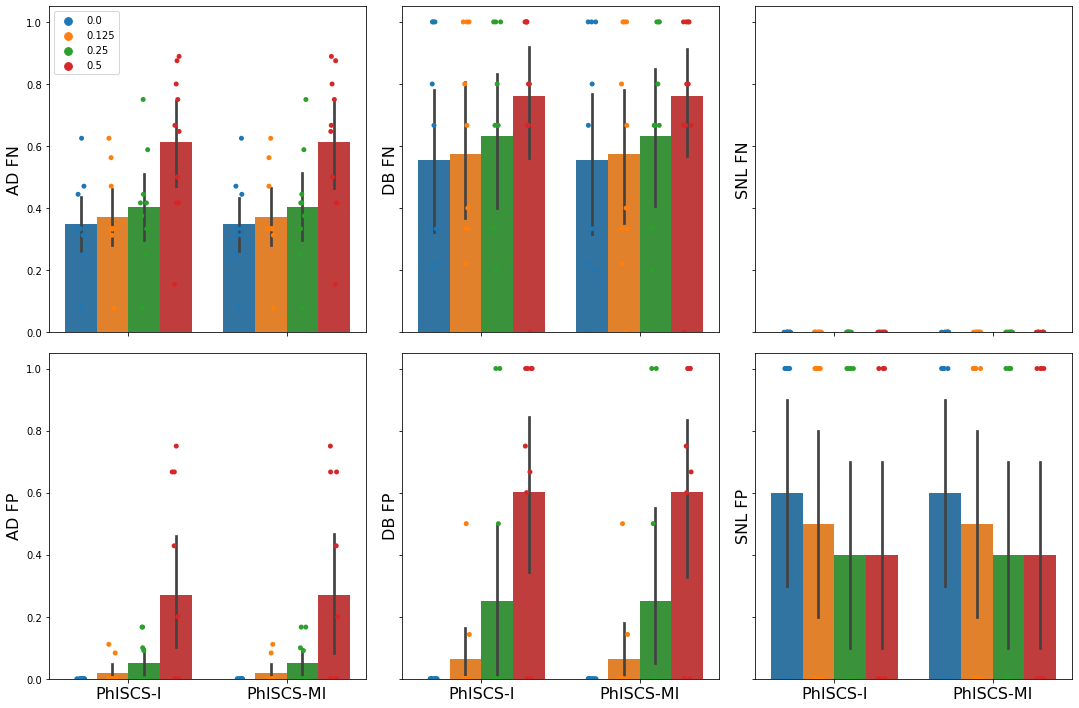

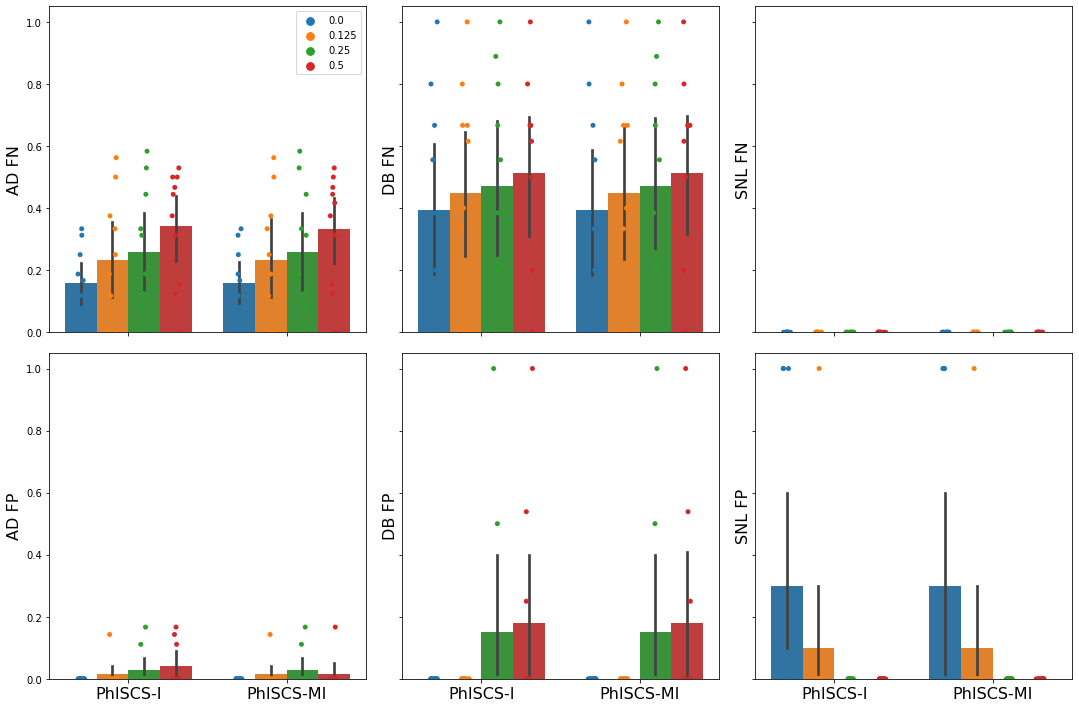

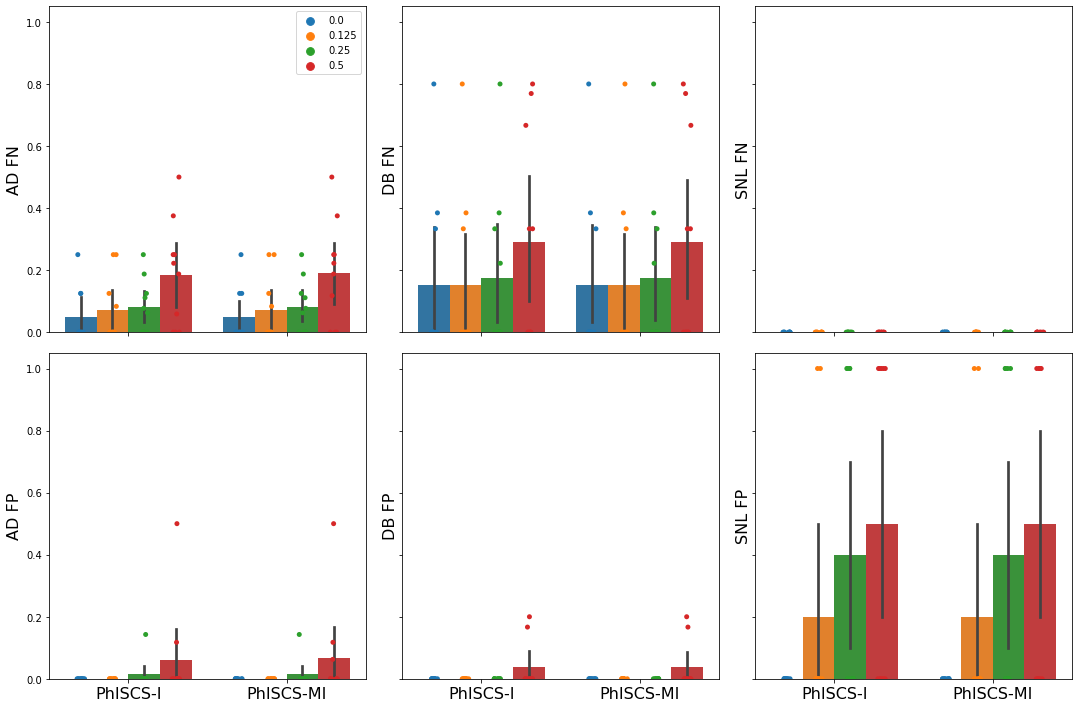

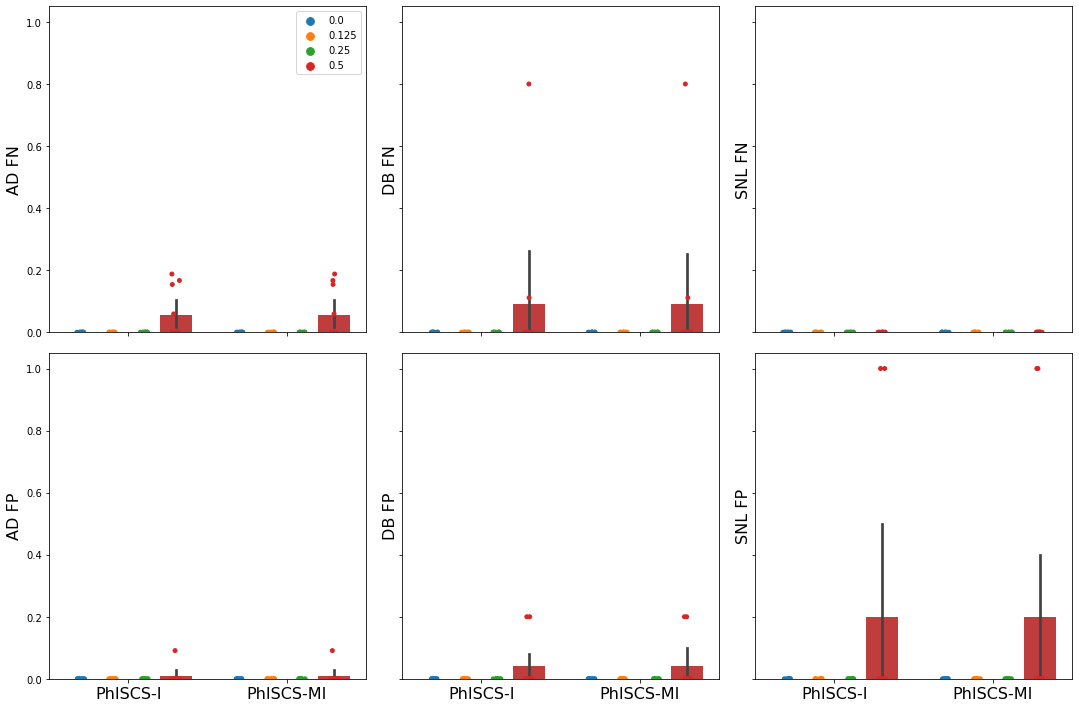

In [13]:
df = pd.read_csv("benchmark/sim1a_benchmark.csv", header=0)
df.loc[df.method == 'modified_PhISCS', 'method'] = 'PhISCS-MI'
df.loc[df.method == 'PhISCS', 'method'] = 'PhISCS-I'

if not os.path.isdir('figures/sim1a'):
    os.system('mkdir -p figures/sim1a')

# by default, we consider PhISCS with kmax=0
orders = [['AD FN', 'DB FN', 'SNL FN'], ['AD FP', 'DB FP', 'SNL FP']]

for num_cell in [10, 20, 40, 100]:
    sub_df = df.loc[(df['# cells'] == num_cell) & (df['kmax'] == 0)]
    fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey=True, sharex='col')
    fig.tight_layout()
    for i in range(2):
        for j in range(3):
            sns.barplot(data=sub_df, x='method', hue='missing rate', y=orders[i][j], ax=ax[i][j])
            sns.stripplot(data=sub_df, x='method', hue='missing rate', y=orders[i][j], ax=ax[i][j],
                         dodge=True)
            ax[i][j].set_xlabel("")
            handles, labels = ax[i][j].get_legend_handles_labels()
            l = ax[i][j].legend(handles[0:4], labels[0:4])

            if not (i == 0 and j == 0):
                ax[i][j].get_legend().remove()
    fig.savefig("figures/sim1a/sim1a_n={}.svg".format(num_cell), bbox_inches = 'tight')
    fig.savefig("figures/sim1a/sim1a_n={}.png".format(num_cell), dpi=300, bbox_inches = 'tight')

/anaconda3/envs/rapids-core-0.17/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/anaconda3/envs/rapids-core-0.17/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/anaconda3/envs/rapids-core-0.17/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/anaconda3/envs/rapids-core-0.17/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/anaconda3/envs/rapids-core-0.17/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/anaconda3/envs/rapids-core-0.17/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/anaconda3/envs/rapids-core-

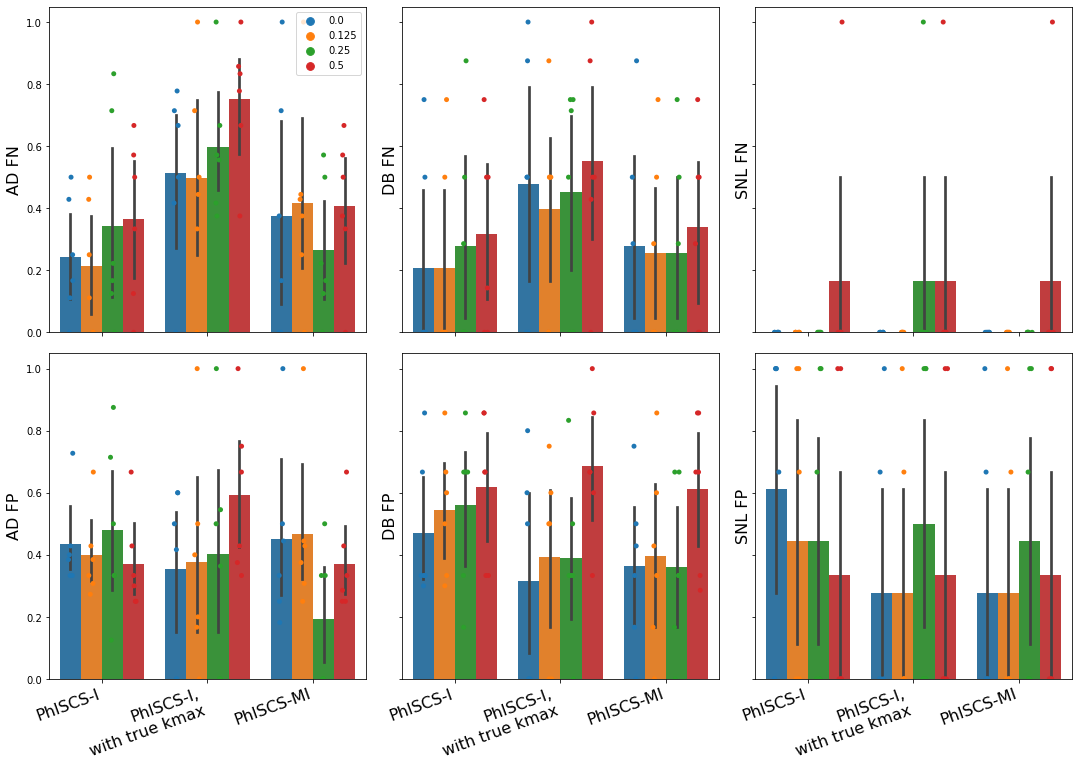

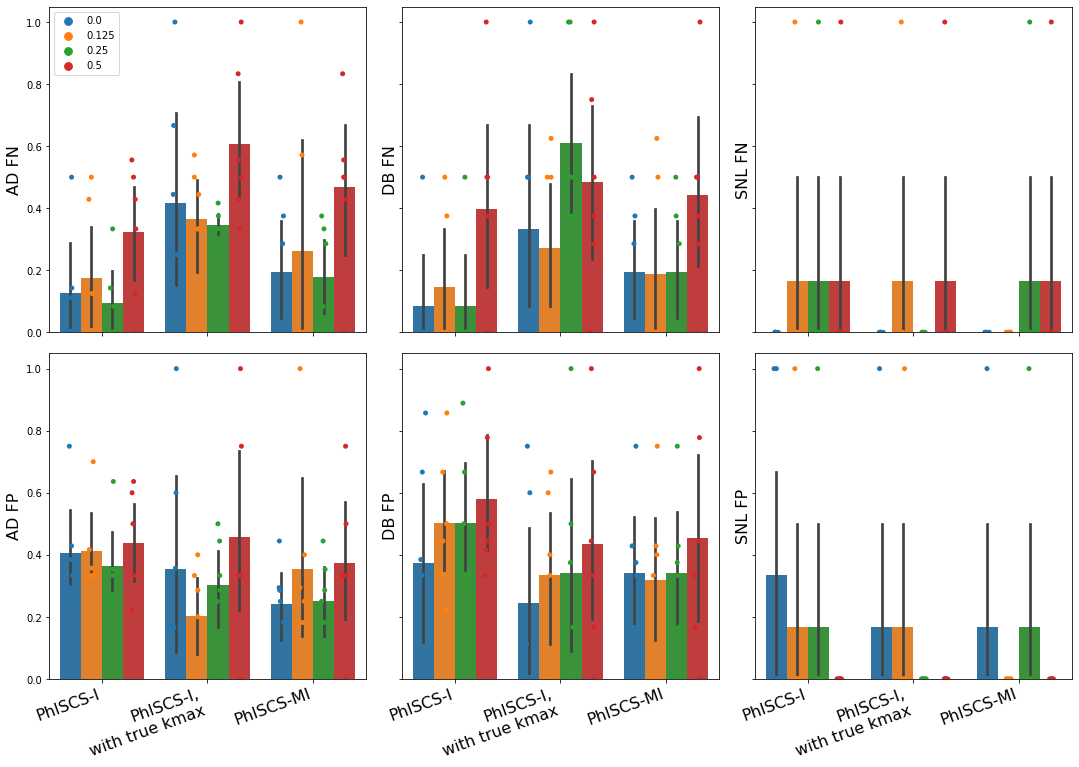

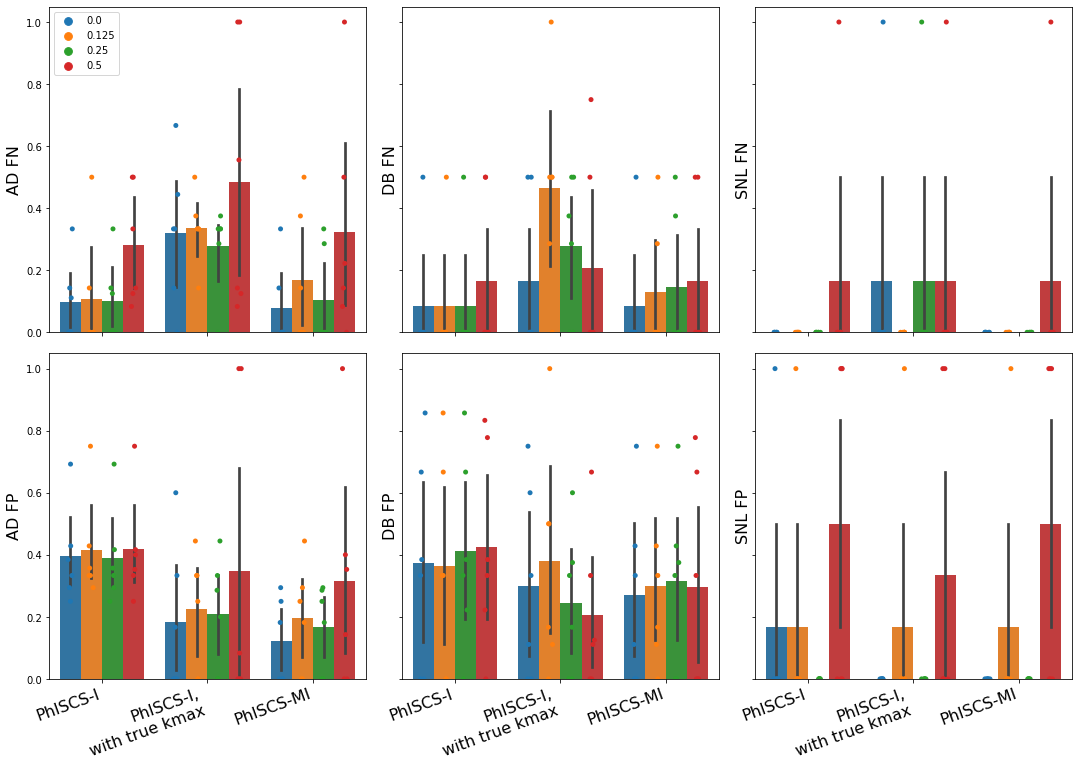

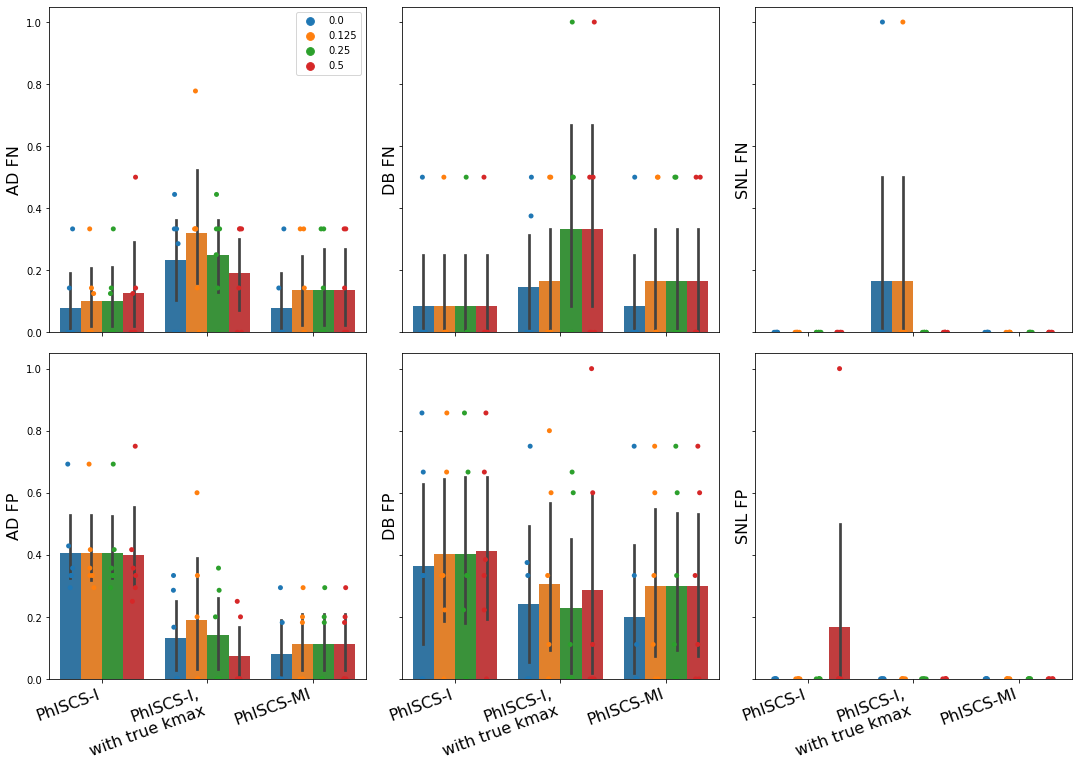

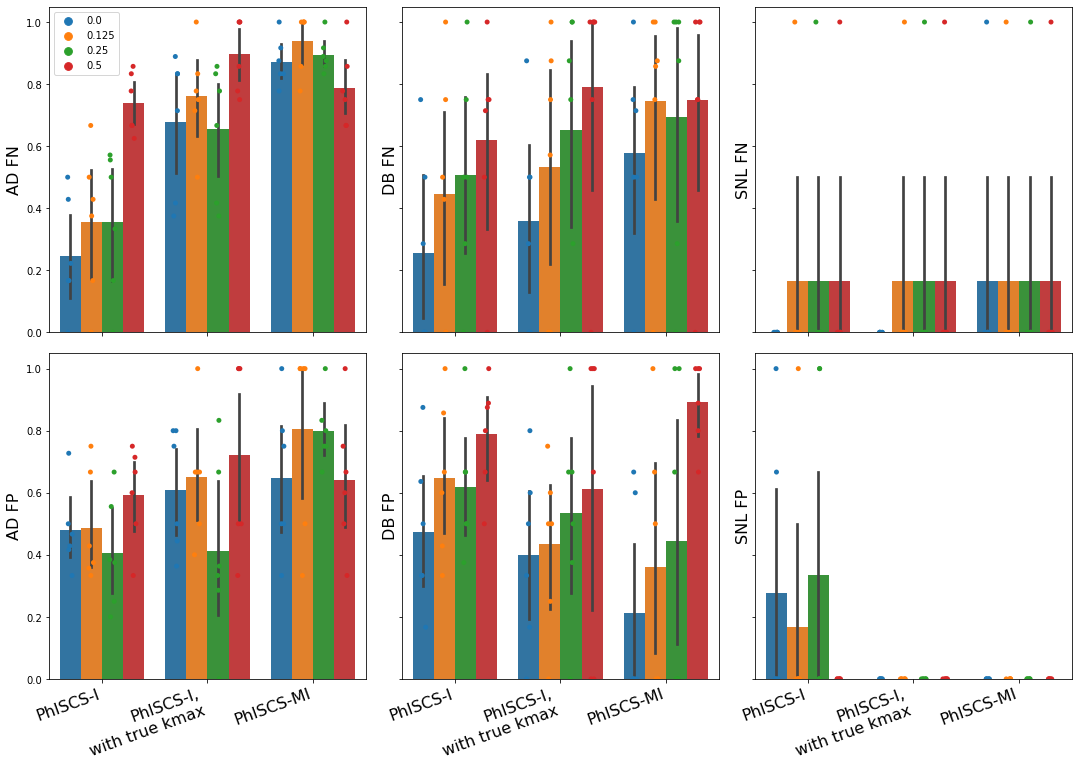

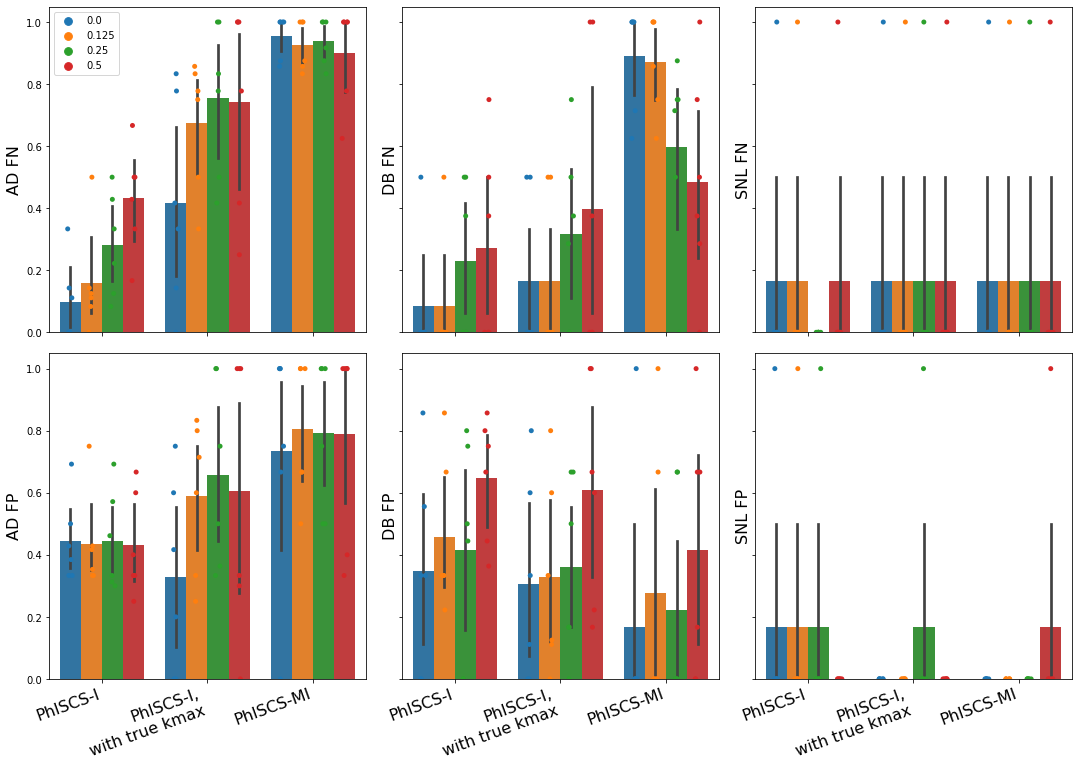

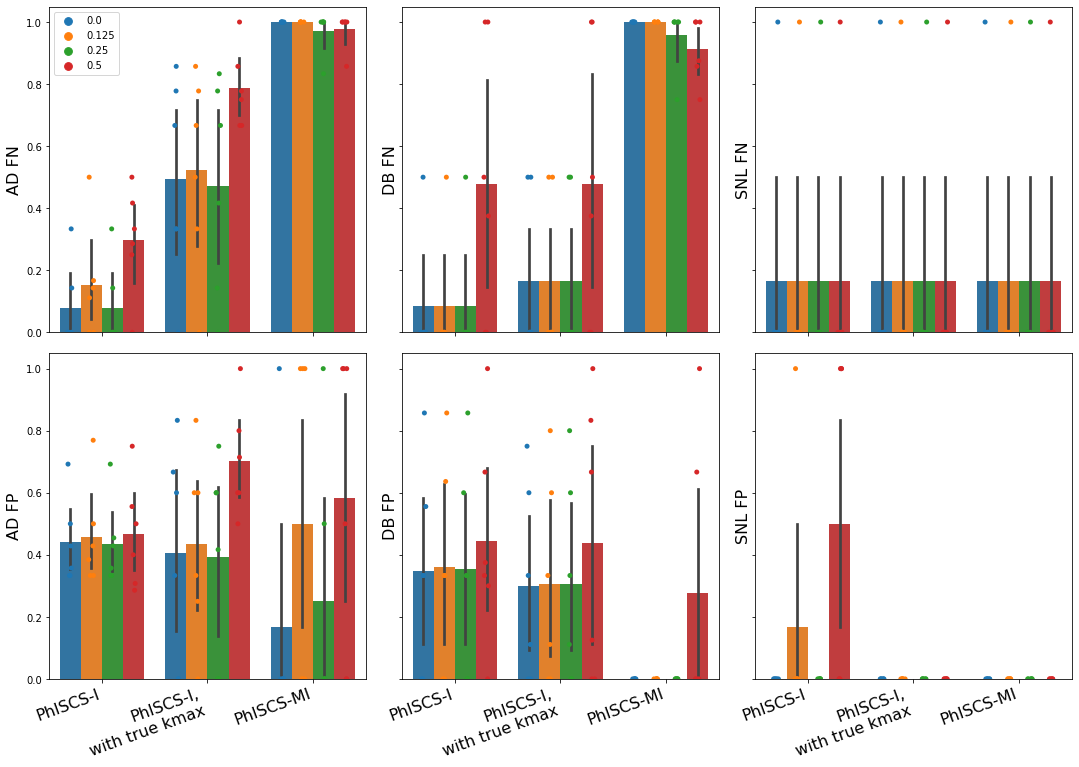

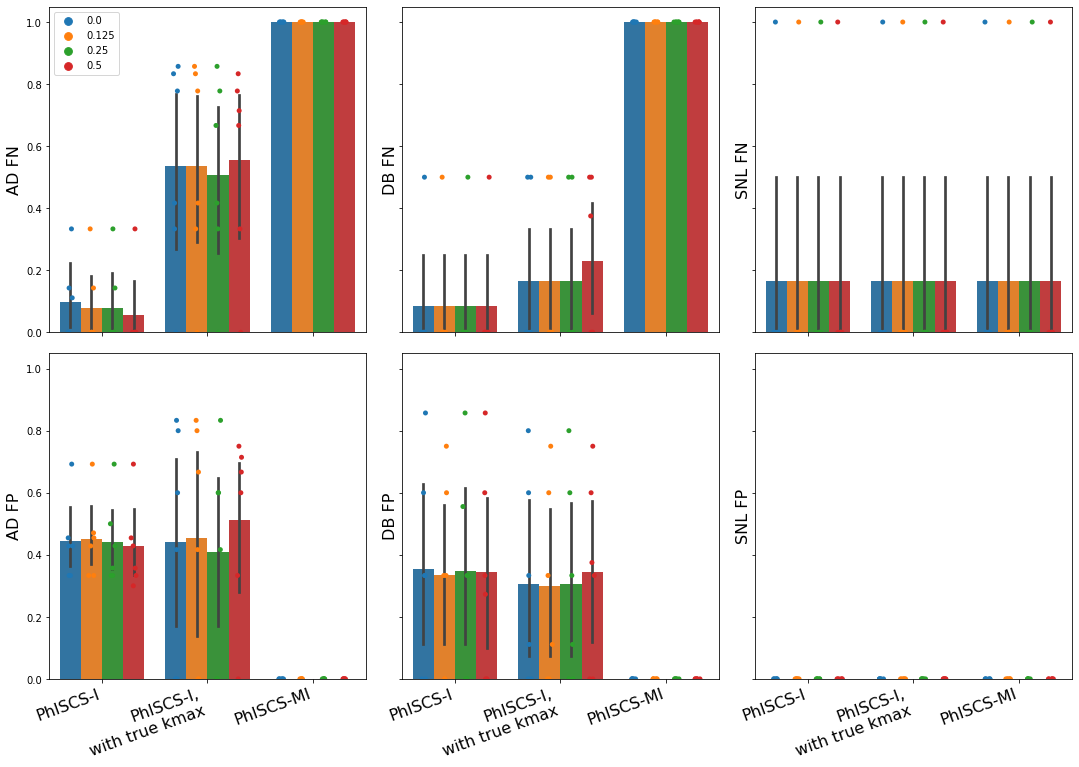

In [14]:
df = pd.read_csv("benchmark/isa_violations_benchmark.csv", header=0)
df.loc[df.method == 'modified_PhISCS', 'method'] = 'PhISCS-MI'
df.loc[df.method == 'PhISCS', 'method'] = 'PhISCS-I'
df.loc[df.method == 'PhISCS-given-kmax', 'method'] = 'PhISCS-I,\n with true kmax'

indexes = df.loc[df.method == 'modified_PhISCS-p=10'].index
df = df.drop(indexes)

betas= [0, 0.2]

for b in betas:
    if not os.path.isdir('figures/sim5a/b={}'.format(b)):
        os.system('mkdir -p figures/sim5a/b={}'.format(b))

    # by default, we consider PhISCS with kmax=0
    orders = [['AD FN', 'DB FN', 'SNL FN'], ['AD FP', 'DB FP', 'SNL FP']]

    for num_cell in [10, 20, 40, 100]:
        sub_df = df.loc[(df['# cells'] == num_cell) & (df['FN rate'] == b)]
        fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey=True, sharex='col')
        fig.tight_layout()
        for i in range(2):
            for j in range(3):
                ax[i][j].set_xticklabels(ax[i][j].get_xticks(), rotation=20, ha='right')
                sns.barplot(data=sub_df, x='method', hue='missing rate', y=orders[i][j], ax=ax[i][j])
                sns.stripplot(data=sub_df, x='method', hue='missing rate', y=orders[i][j], ax=ax[i][j],
                             dodge=True)
                ax[i][j].set_xlabel("")
                handles, labels = ax[i][j].get_legend_handles_labels()
                l = ax[i][j].legend(handles[0:4], labels[0:4])

                if not (i == 0 and j == 0):
                    ax[i][j].get_legend().remove()
        fig.savefig("figures/sim5a/b={}/sim5a_n={}.svg".format(b, num_cell), bbox_inches = 'tight')
        fig.savefig("figures/sim5a/b={}/sim5a_n={}.png".format(b, num_cell), dpi=300, bbox_inches = 'tight')